# Bayesian regression

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Question 1
>Let us consider the Bayesian regression model
$$y = \Phi_x w + \epsilon,$$
where $w \sim \mathcal N(0, \alpha^{-1} I_2)$ and $\epsilon | w \sim \mathcal N(0, \beta^{-1} I_n)$, with $\alpha=0.1$, $\beta=5$, $n=2$.
Here, for $i = 1, \dots, n$, the $i^\text{th}$ row of $\Phi_x$ is $\phi(x_i) = [\sin(x_i), 1]$, where $x_1, \dots, x_n \overset{i.i.d.}{\sim} \mathcal U([0, 2\pi])$.
>
>Write a function `phi(x)` that returns $\Phi_x$ for `x=`$(x_1, \dots, x_n)$.

In [2]:
# Answer
n = 10  # Sample size

def phi(x):
    return np.c_[np.sin(x), np.ones(x.shape[0])]

X = 2*np.pi*np.random.rand(n)  # Design matrix

Phi = phi(X)

## Question 2
> Sample $y$ according to the Bayesian model described previously.
Plot the on the same figure:
>1. the graph of the function $x' \in [0, 2\pi] \mapsto \phi(x')w$;
>1. the observations $y_1, \dots, y_n$ against $x_1, \dots, x_n$.

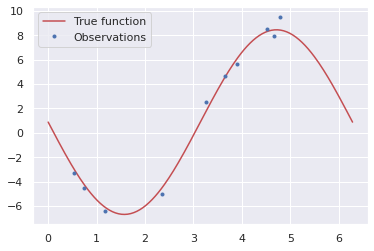

In [3]:
# Answer
alpha = .1  # Prior precision
beta = 5.  # Noise precision

w = multivariate_normal.rvs(cov=np.eye(2)/alpha)  # True parameter
Y = Phi@w + multivariate_normal.rvs(cov=np.eye(n)/beta)

x = np.linspace(0, 2*np.pi, num=200)

plt.plot(x, phi(x)@w, 'r', label='True function')
plt.plot(X, Y, '.', label='Observations')
plt.legend()
ylim = plt.ylim()

## Question 3
>Compute the Bayesian estimator/predictor $x_{\mathrm{new}} \mapsto \hat{y}^{\mathcal{D}}(x_{\mathrm{new}})$.

In [4]:
# Answer
cov = np.linalg.inv(alpha*np.eye(Phi.shape[1]) + beta*Phi.T@Phi)  # Posterior covariance
mean = beta*cov@Phi.T@Y  # Posterior mean

mean_x = phi(x)@mean

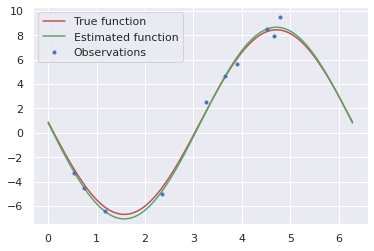

In [5]:
# Answer
plt.plot(x, phi(x)@w, 'r', label='True function')
plt.plot(x, mean_x, 'g', label='Estimated function')
plt.plot(X, Y, '.', label='Observations')
plt.ylim(ylim)
plt.legend();

## Question 4
>Compute the standard deviation $\sigma_N(x_\text{new})$ of $y_\text{new} | x_\text{new}$ and illustrate the predictive uncertainty by plotting a shaded region, that spans $\sigma_N(x')$ either side of $\hat{y}^{\mathcal{D}}(x')$.

In [6]:
# Answer
sigma_x = np.sqrt(1/beta + np.diag(phi(x)@cov@phi(x).T))

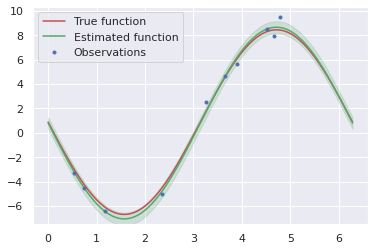

In [7]:
# Answer
plt.plot(x, phi(x)@w, 'r', label='True function')
plt.plot(x, mean_x, 'g', label='Estimated function')
plt.plot(X, Y, '.', label='Observations')
plt.fill_between(x, mean_x - sigma_x, mean_x + sigma_x, color='g', alpha=.2)
plt.ylim(ylim)
plt.legend();

## Homework
>Suppose we want to address the previous problem with polynomial regression.
Determine an adequate degree for polynomial regression based on Bayesian hyper-parameter selection (or model selection).
Under uniform prior, it boils down to maximizing the marginal likelihood.

In [8]:
# Answer
n = 30  # Sample size
alpha = .1  # Prior precision
beta = 5.  # Noise precision

X = 2*np.pi*np.random.rand(n)  # Design matrix
Phi = phi(X)
w = multivariate_normal.rvs(cov=np.eye(2)/alpha)  # True parameter
Y = Phi@w + multivariate_normal.rvs(cov=np.eye(n)/beta)

Best model for (degree, evidence)=(3, -19.784898686767704).



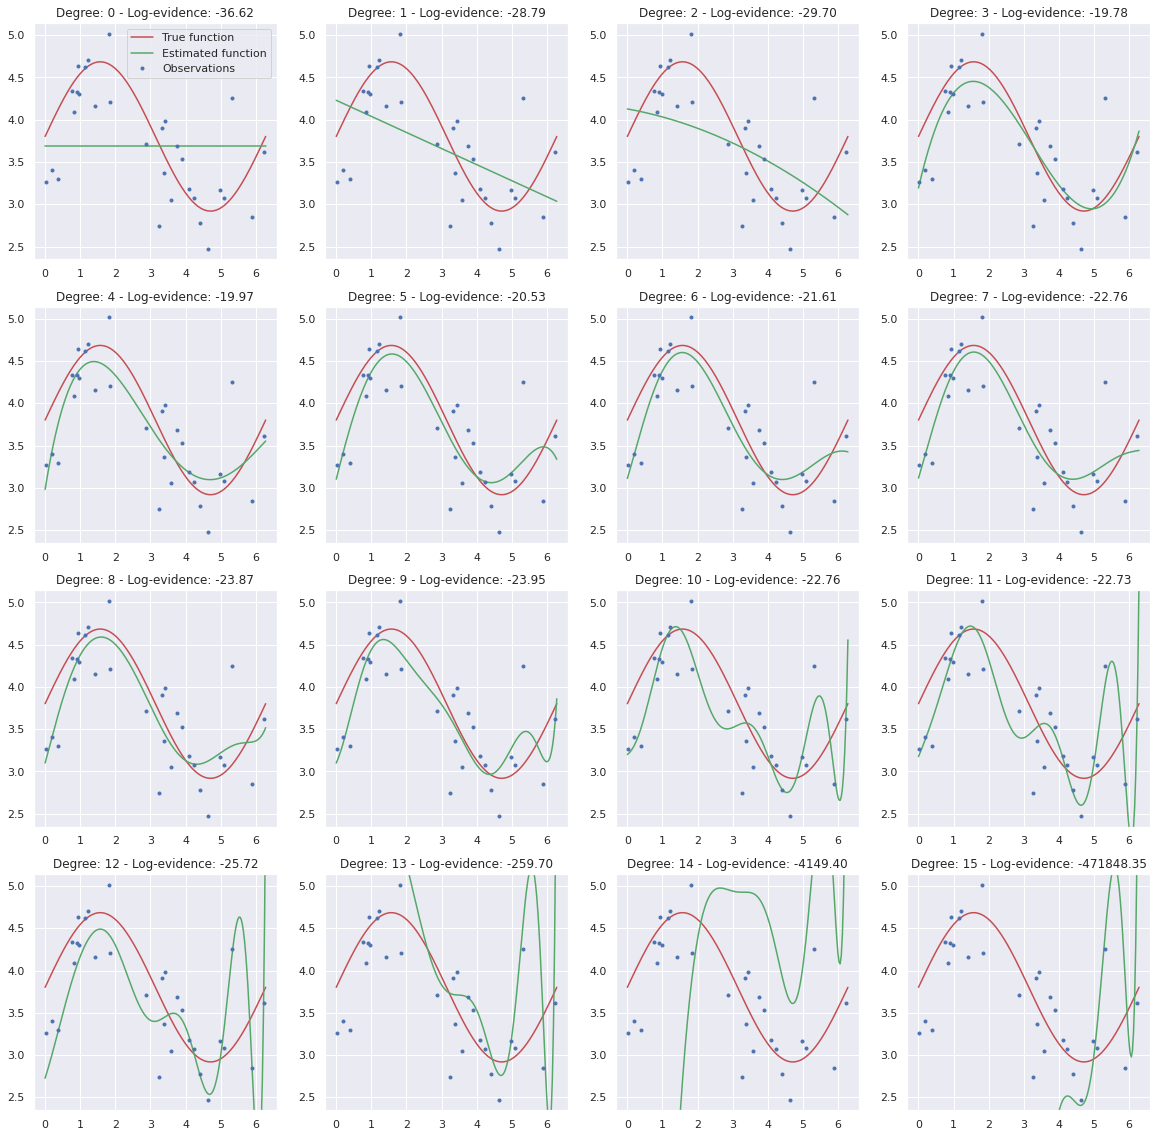

In [9]:
# Answer
def poly(x, d):
    features = []
    for p in range(d+1):
        features.append(x**p)
    return np.array(features).T

def posterior(X, Y, d):
    Phi = poly(X, d)
    cov = np.linalg.inv(alpha*np.eye(Phi.shape[1]) + beta*Phi.T@Phi)  # Posterior covariance
    mean = beta*cov@Phi.T@Y  # Posterior mean
    return mean, cov

def logevidence(X, Y, d):
    Phi = poly(X, d)
    mean, cov = posterior(X, Y, d)
    return np.log(alpha)*d/2 + (np.log(beta) - np.log(2*np.pi))*X.shape[0]/2 + np.linalg.det(cov)/2 - (beta * np.linalg.norm(Y-Phi@mean)**2 / 2 + alpha * np.linalg.norm(mean)**2 / 2)

res = []  # List of (degree, log-evidence)
fig, axes = plt.subplots(4, 4, figsize=(20,)*2)
for d, ax in enumerate(axes.flat):
    mean, _ = posterior(X, Y, d)  # d: degree of polynomial regression
    est_fun = poly(x, d) @ mean  # Estimated function
    logev = logevidence(X, Y, d)
    res.append((d, logev))
    ax.plot(x, phi(x)@w, 'r', label='True function')
    ax.plot(x, est_fun, 'g', label='Estimated function')
    ax.plot(X, Y, '.', label='Observations')
    if d==0:
        ax.legend()
        ylim = ax.get_ylim()
    ax.set_ylim(ylim)
    ax.set_title(f'Degree: {d} - Log-evidence: {logev:.2f}')
    
print(f'Best model for (degree, evidence)={max(res, key=lambda x: x[1])}.', end='\n\n')